In [1]:
import numpy as np
import matplotlib.pyplot as plt

import xobjects as xo
import xline as xl
import xtrack as xt

from cpymad.madx import Madx
import sixtracktools as st


In [2]:
sequence = xl.Line.from_json("masks/line_bb_for_tracking.json")

In [5]:
## Choose a context
# context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
context = xo.ContextPyopencl(device='1.0')  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
tracker = xt.Tracker(_context=context, sequence=sequence, global_xy_limit=1e-1)


generating ./5a5e30bda01345ff8c0e856780172c48.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators'
running build_ext
building '5a5e30bda01345ff8c0e856780172c48' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 5a5e30bda01345ff8c0e856780172c48.c -o ./5a5e30bda01345ff8c0e856780172c48.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./5a5e30bda01345ff8c0e856780172c48.o -o ./5a5e30bda01345ff8c0e856780172c48.cpython-38-x86_64-linux-gnu.so -std=c99 -O3


In [6]:
# Build particle object on context
n_part = 100
particles = xt.Particles(_context=context,
                         p0c=7000e9, # 7.0 TeV
                         x=np.random.uniform(-1e-3, 1e-3, n_part),
                         px=np.random.uniform(-1e-5, 1e-5, n_part),
                         y=np.random.uniform(-2e-3, 2e-3, n_part),
                         py=np.random.uniform(-3e-5, 3e-5, n_part),
                         #zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                         #delta=np.random.uniform(-1e-4, 1e-4, n_part),
                         )

## Track (saving turn-by-turn data)
n_turns = 1000
tracker.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=False)




In [10]:
print(tracker.__dict__.keys())

print(tracker.__dict__["record_last_track"])


dict_keys(['iscollective', 'global_xy_limit', 'line', 'particles_class', 'particles_monitor_class', 'ele_offsets_dev', 'ele_typeids_dev', 'num_elements', 'skip_end_turn_actions', 'local_particle_src', 'element_classes', 'track_kernel', 'track', 'record_last_track'])
None


In [17]:
x = sorted(zip(particles.particle_id, particles.at_turn), key=lambda x: x[0])

In [18]:
x

[(0, 100),
 (1, 100),
 (2, 5),
 (3, 0),
 (4, 100),
 (5, 100),
 (6, 12),
 (7, 100),
 (8, 100),
 (9, 100),
 (10, 0),
 (11, 100),
 (12, 100),
 (13, 100),
 (14, 100),
 (15, 100),
 (16, 60),
 (17, 100),
 (18, 100),
 (19, 100),
 (20, 100),
 (21, 100),
 (22, 12),
 (23, 100),
 (24, 96),
 (25, 51),
 (26, 100),
 (27, 100),
 (28, 100),
 (29, 3),
 (30, 80),
 (31, 100),
 (32, 100),
 (33, 9),
 (34, 100),
 (35, 100),
 (36, 100),
 (37, 100),
 (38, 100),
 (39, 100),
 (40, 100),
 (41, 100),
 (42, 58),
 (43, 100),
 (44, 100),
 (45, 100),
 (46, 100),
 (47, 100),
 (48, 100),
 (49, 100),
 (50, 100),
 (51, 0),
 (52, 100),
 (53, 100),
 (54, 100),
 (55, 100),
 (56, 0),
 (57, 100),
 (58, 100),
 (59, 15),
 (60, 100),
 (61, 100),
 (62, 78),
 (63, 1),
 (64, 70),
 (65, 100),
 (66, 100),
 (67, 100),
 (68, 100),
 (69, 100),
 (70, 100),
 (71, 100),
 (72, 100),
 (73, 100),
 (74, 100),
 (75, 100),
 (76, 100),
 (77, 0),
 (78, 100),
 (79, 100),
 (80, 100),
 (81, 10),
 (82, 100),
 (83, 100),
 (84, 100),
 (85, 100),
 (86, 0

In [9]:
## Turn-by-turn data is available at:
x = tracker.record_last_track.x
px = tracker.record_last_track.px
y = tracker.record_last_track.y
py = tracker.record_last_track.py
zeta = tracker.record_last_track.zeta
delta = tracker.record_last_track.delta

In [23]:
particles.get_active_particle_id_range()

(0, 9995)

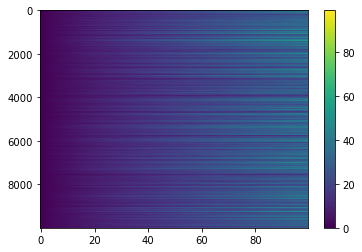

In [26]:
plt.imshow(tracker.record_last_track.at_turn, aspect='auto')
plt.colorbar()

In [41]:
plt.scatter(x[:, 0], y[:, 0], s=1, label="{} turns".format(0))
plt.scatter(x[:, -1], y[:, -1], s=1, label="{} turns".format(n_turns), alpha=0.5)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()

NameError: name 'x' is not defined

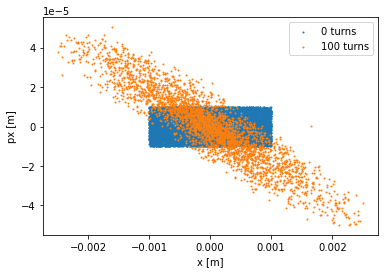

In [11]:
plt.scatter(x[:, 0], px[:, 0], s=1, label="{} turns".format(0))
plt.scatter(x[:, -1], px[:, -1], s=1, label="{} turns".format(n_turns))
plt.xlabel("x [m]")
plt.ylabel("px [m]")
plt.legend()


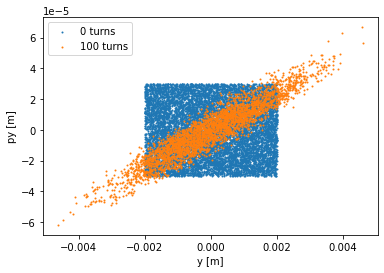

In [12]:
plt.scatter(y[:, 0], py[:, 0], s=1, label="{} turns".format(0))
plt.scatter(y[:, -1], py[:, -1], s=1, label="{} turns".format(n_turns))
plt.xlabel("y [m]")
plt.ylabel("py [m]")
plt.legend()

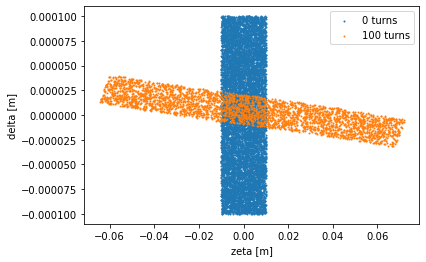

In [13]:
plt.scatter(zeta[:, 0], delta[:, 0], s=1, label="{} turns".format(0))
plt.scatter(zeta[:, -1], delta[:, -1], s=1, label="{} turns".format(n_turns))
plt.xlabel("zeta [m]")
plt.ylabel("delta [m]")
plt.legend()